# ***Predicting Housing Prices : A Step by Step Guild to Building a Linear Models***

![Real Estate](https://www.kcha.org/portals/0/Images/Leader/Leader_91.jpg)


# ***1. Introduction***

## ***Project Overview***

*This notebook demonstrates the process of predicting housing prices using a Linear Regression model. We'll walk through the following steps:*

*1. Data exploration*

*2. Data preprocessing*

*3. Model building*

*4. Model evaluation*

*5. Conclusion*

## ***Dataset***

*We're using the "Housing Prices" dataset from Kaggle, which contains detailed information about houses in a specific region, including:*

- Number of bedrooms and bathrooms
- Square footage
- Various amenities and features

## ***Motivation***

*Accurate housing price prediction models are invaluable in real estate and finance, aiding:*

- *Buyers in making informed purchasing decisions*
- *Sellers in setting competitive prices*
- *Investors in identifying lucrative opportunities*

> *💡 If you find this notebook helpful, please consider upvoting! Your support encourages the creation of more valuable content for the community.*

## ***Data Description***

*Our dataset comprises the following key features:*

| *Feature* | *Description* |
|---------|-------------|
| *price* | *Target variable: Sale price of the property* |
| *area* | *Total property area (sq. ft. or sq. m.)* |
| *bedrooms* | *Number of bedrooms* |
| *bathrooms* | *Number of bathrooms* |
| *stories* | *Number of stories/levels* |
| *mainroad* | *Property located on a main road (Yes/No)* |
| *guestroom* | *Presence of a guestroom (Yes/No)* |
| *basement* | *Presence of a basement (Yes/No)* |
| *hotwaterheating* | *Hot water heating system (Yes/No)* |
| *airconditioning* | *Air conditioning system (Yes/No)* |
| *parking* | *Number of parking spaces* |
| *prefarea* | *Located in a preferred area (Yes/No)* |
| *furnishingstatus* | *Furnishing status (e.g., furnished, semi-furnished, unfurnished)* |

*This rich dataset allows us to explore various factors influencing housing prices and build a comprehensive predictive model.*

# ***2. Data Exploration***

## ***2.1 Importing Essential Libraries***

*In this section, we'll import the necessary libraries for our data analysis and model building:*

*Let's begin by importing these crucial libraries:*

In [2]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy import stats

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

## ***2.2 Load the data***

In [3]:
df = pd.read_csv("../data/Housing Prices Dataset.csv")

## ***2.3 Data Overview***

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


> ### ***Observation 1***
- *we have 545 rows and 13 columns in the dataset*
- *6 columns have int64 data type*
- *7 columns have object data type*

In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


> ### ***Observation 2***
- *The average house price is about 4,766,729, with a standard deviation of 1,870,440*
- *The average area is 5150.54 square units, with a minimum of 1650 and maximum of 16200*
- *Most houses have 2-3 bedrooms, with an average of 2.97*
- *The majority of houses have 1-2 bathrooms, with an average of 1.29*
- *Houses typically have 1-2 stories, with an average of 1.81*
- *Parking spaces range from 0 to 3, with an average of 0.69*


In [7]:
# checking the unique values
unique_counts = df.nunique()
print("Number of unique values per column:")
print(unique_counts)

Number of unique values per column:
price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64


# ***3. Data Preprocessing***

## ***3.1 Data Cleaning***

### ***3.1.1 Handling Missing Values***

*This section focuses on essential data preprocessing steps to ensure the dataset is clean and prepared for analysis. The initial step involves addressing any potential missing values in the housing price dataset.*

In [8]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print("Missing values in each column:")
print(missing_values)

# Verify if the dataset is clean (no missing values)
if missing_values.sum() == 0:
    print("\nThe dataset is clean: No missing values found.")
else:
    print(f"\nThe dataset contains {missing_values.sum()} missing values.")

Missing values in each column:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

The dataset is clean: No missing values found.


### ***3.1.2 Outlier Detection***

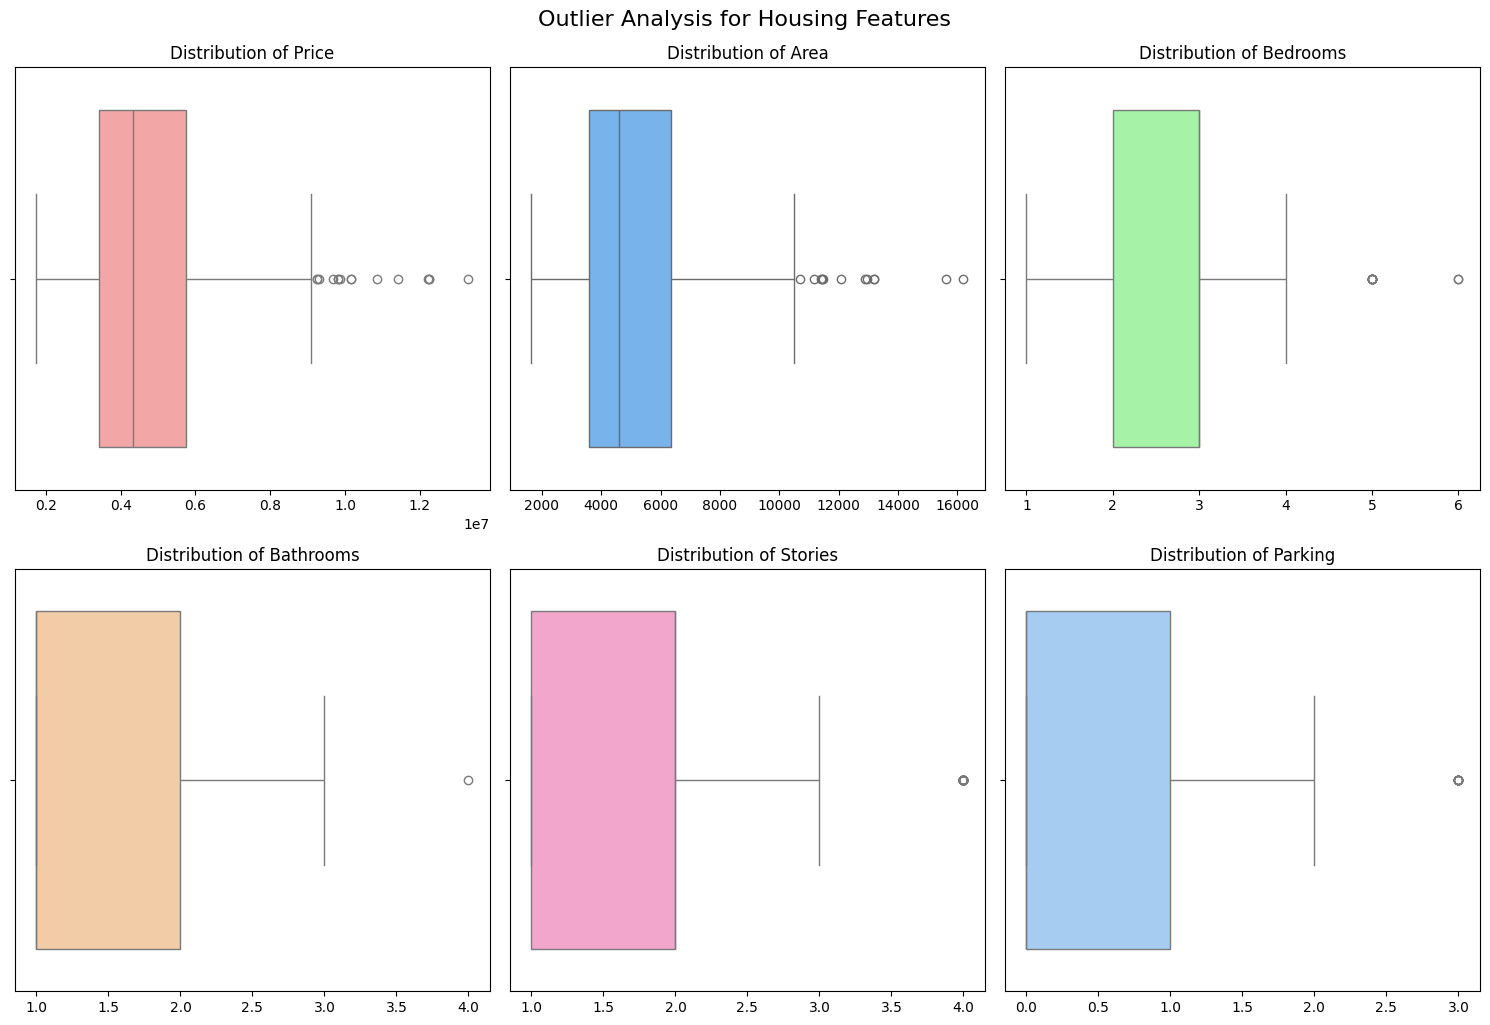

In [9]:
# Outlier Analysis
plt.figure(figsize=(15, 10))

features = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc', '#99ccff']

for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[feature], color=colors[i])
    plt.title(f'Distribution of {feature.capitalize()}', fontsize=12)
    plt.xlabel('')
    
plt.tight_layout()
plt.suptitle('Outlier Analysis for Housing Features', fontsize=16, y=1.02)
plt.show()

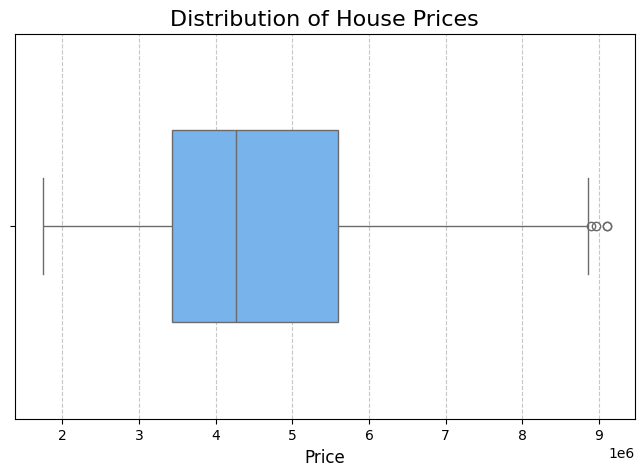

In [10]:
# Outlier Treatment
# Price and area have considerable outliers.
# We can remove the outliers as we have sufficient data.

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

def plot_boxplot(df, column, color, title):
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[column], color=color, width=0.5)
    plt.title(title, fontsize=16)
    plt.xlabel(column.capitalize(), fontsize=12)
    plt.ylabel('', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

# Remove outliers for price
df = remove_outliers(df, 'price')
plot_boxplot(df, 'price', '#66b3ff', 'Distribution of House Prices')

Text(0.5, 1.02, 'Outlier Analysis for Housing Features')

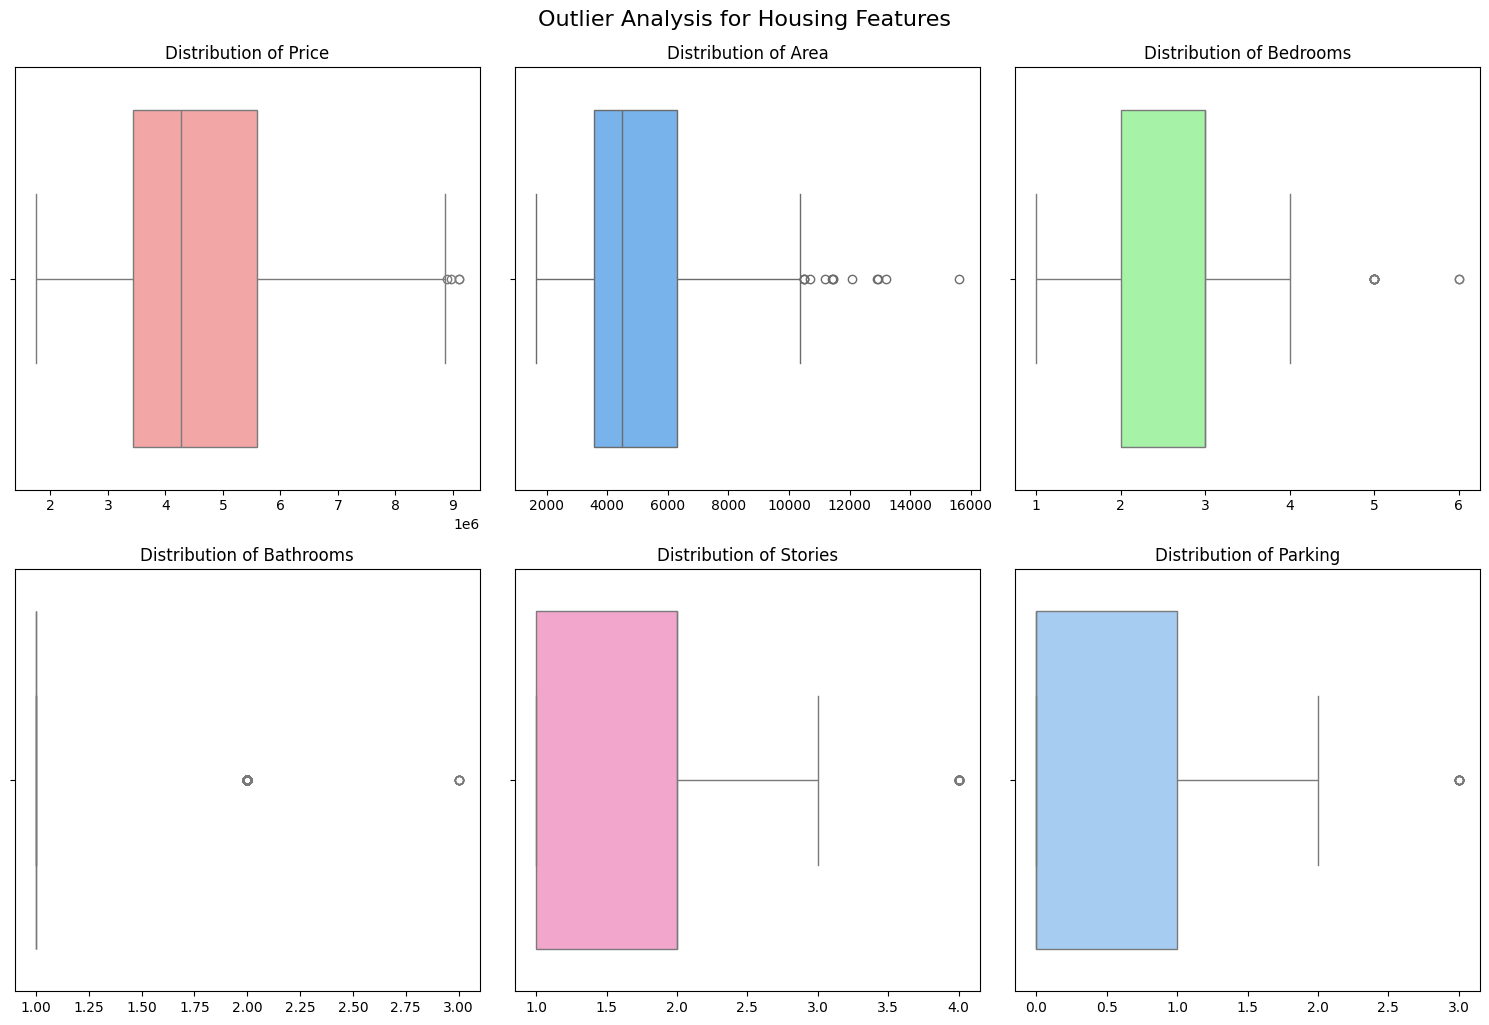

In [11]:
# Outlier Analysis
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
features = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc', '#99ccff']

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    sns.boxplot(x=df[feature], ax=axs[row, col], color=colors[i])
    axs[row, col].set_title(f'Distribution of {feature.capitalize()}', fontsize=12)
    axs[row, col].set_xlabel('')

plt.tight_layout()
fig.suptitle('Outlier Analysis for Housing Features', fontsize=16, y=1.02)

### ***3.1.4 Data Duplication***

In [12]:
# Check for duplicate rows in the dataset
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


*Fantastic news! Our dataset is free from duplicate rows! 🎉*

*This clean, unique data will lead to more accurate and reliable analysis. Let's celebrate this data quality win! 🚀📊*

### ***3.1.5 Correcting Errors***

*This section aims to identify and report any anomalies or inconsistencies in our dataset*

In [13]:
# Check for errors in the dataset

def check_numeric_errors(df, columns):
    for col in columns:
        # Check for negative values
        negatives = df[df[col] < 0]
        if not negatives.empty:
            print(f"\nNegative values found in {col}:")
            print(negatives[[col]].head())
        
        # Check for zero values (if applicable)
        zeros = df[df[col] == 0]
        if not zeros.empty:
            print(f"\nZero values found in {col}:")
            print(zeros[[col]].head())
        
        # Check for unrealistic high values
        high_thresholds = {
            'price': 1e9,  # Price above 1 billion
            'area': 100000,  # Area above 100,000 sq ft
            'bedrooms': 10,  # More than 10 bedrooms
            'bathrooms': 10,  # More than 10 bathrooms
            'stories': 100,  # More than 100 stories
            'parking': 10  # More than 10 parking spaces
        }
        
        if col in high_thresholds:
            high = df[df[col] > high_thresholds[col]]
            if not high.empty:
                print(f"\nUnrealistically high values found in {col}:")
                print(high[[col]].head())

def check_categorical_errors(df, columns):
    for col in columns:
        unique_values = df[col].unique()
        print(f"Unique values in {col}: {unique_values}")
        if len(unique_values) > 3:  # Assuming binary or ternary categories
            print(f"Potential inconsistency in {col}. More than expected unique values.")

# Check numeric columns
numeric_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
print("# Checking numeric columns...")
check_numeric_errors(df, numeric_columns)

# Check categorical columns
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
print("\n# Checking categorical columns...")
check_categorical_errors(df, categorical_columns)

print("\n# Error checking complete.")

# Checking numeric columns...

Zero values found in parking:
    parking
26        0
40        0
41        0
45        0
49        0

# Checking categorical columns...
Unique values in mainroad: ['yes' 'no']
Unique values in guestroom: ['no' 'yes']
Unique values in basement: ['yes' 'no']
Unique values in hotwaterheating: ['no' 'yes']
Unique values in airconditioning: ['no' 'yes']
Unique values in prefarea: ['no' 'yes']
Unique values in furnishingstatus: ['semi-furnished' 'unfurnished' 'furnished']

# Error checking complete.


*🎉 Excellent! Our dataset is error-free and of high quality! This clean dataset will significantly enhance our analysis and insights! 📊💡*

*📝 Note: Parking values of 0 are valid, representing properties without parking spaces. 🚗🚫*


### ***3.1.6 Data Distribution***

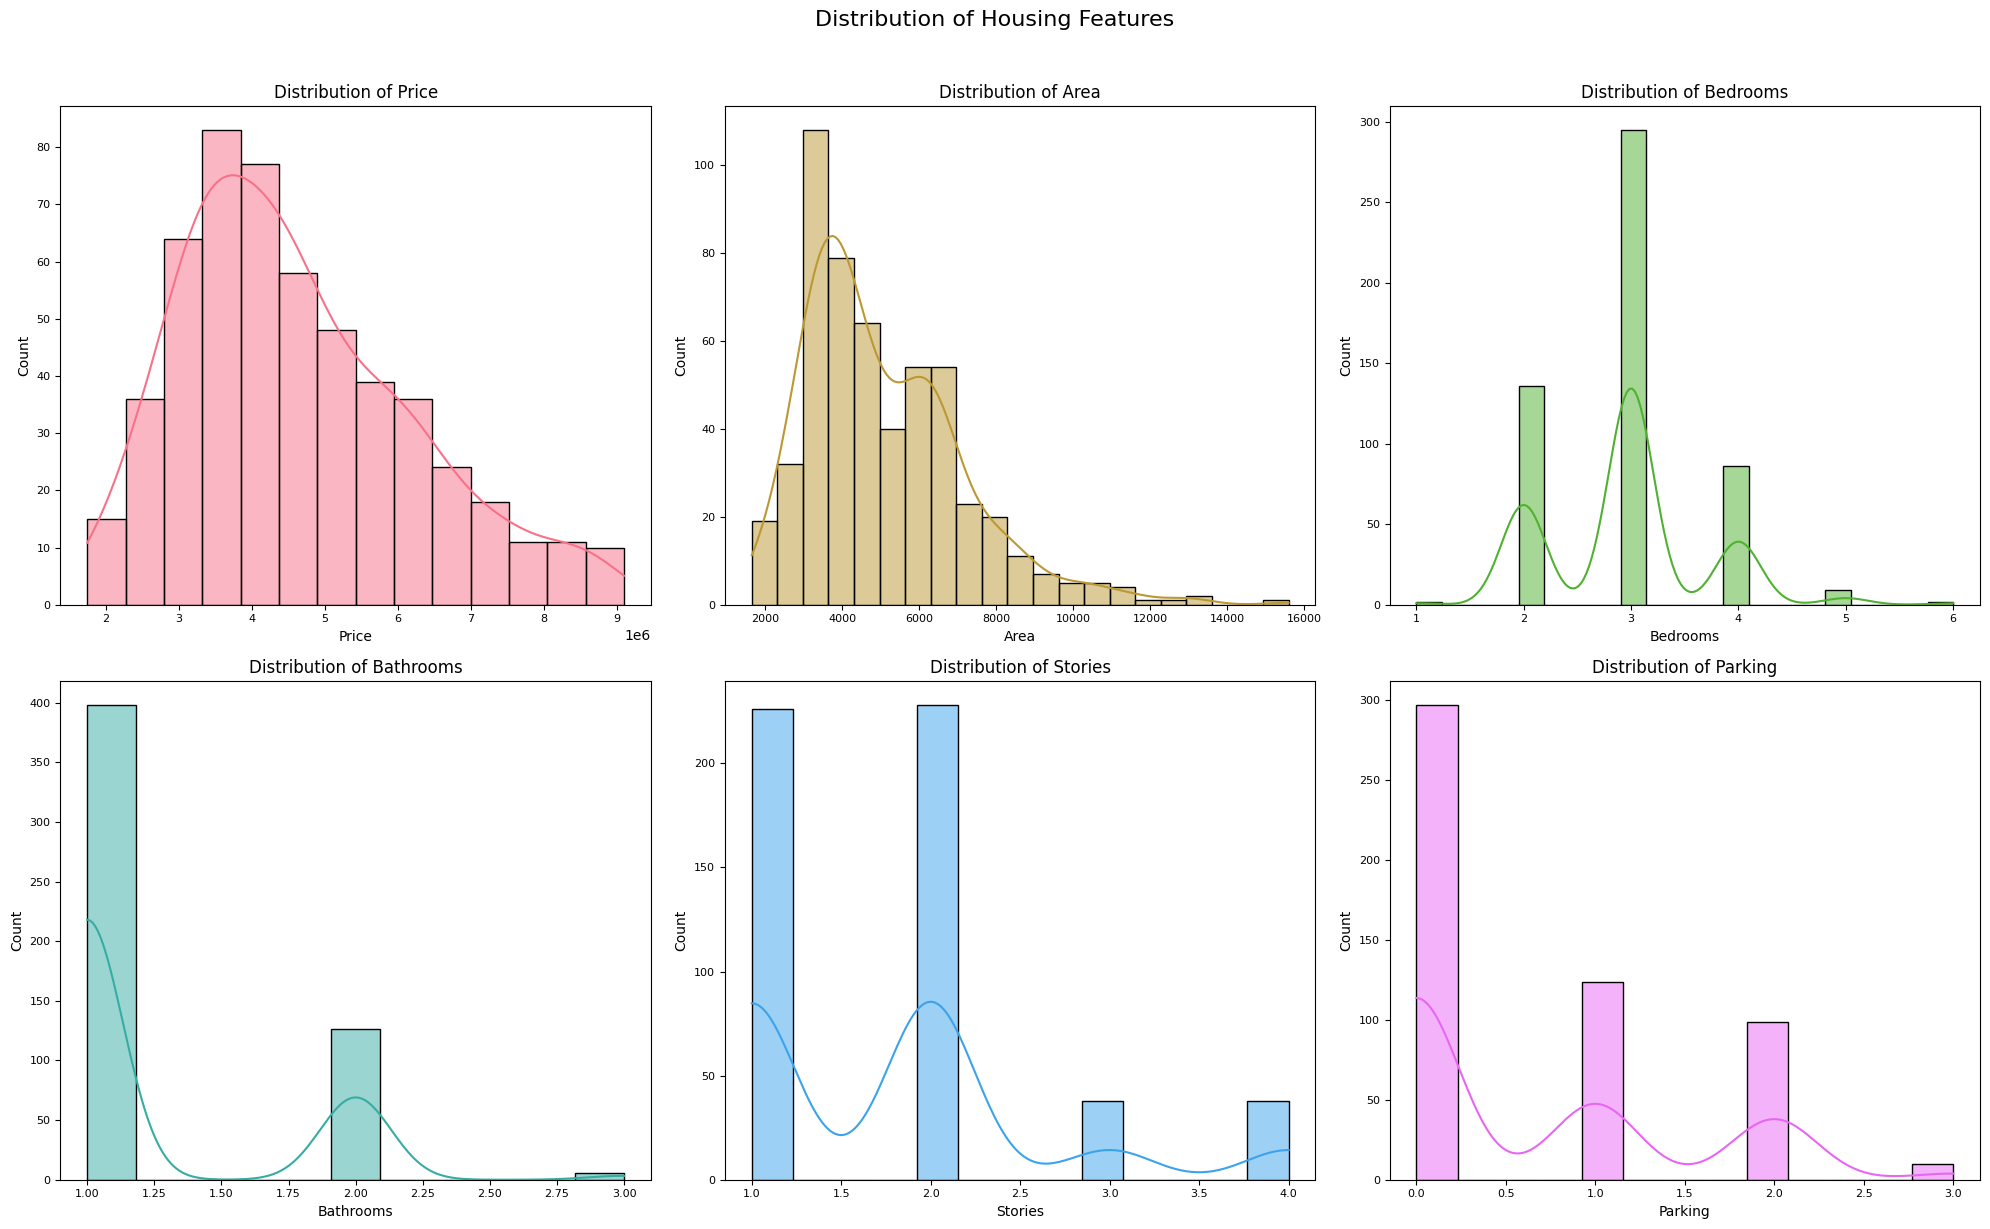

In [14]:
# Visualize distribution using professional histograms
fig, axs = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Distribution of Housing Features', fontsize=16, y=1.02)

features = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
colors = sns.color_palette("husl", 6)

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    sns.histplot(data=df, x=feature, kde=True, ax=axs[row, col], color=colors[i])
    axs[row, col].set_title(f'Distribution of {feature.capitalize()}', fontsize=12)
    axs[row, col].set_xlabel(feature.capitalize(), fontsize=10)
    axs[row, col].set_ylabel('Count', fontsize=10)
    axs[row, col].tick_params(labelsize=8)

plt.tight_layout()
plt.show()

> ***Visualizing Numeric Variables***

*Generate a pairplot to analyze relationships between numeric features*

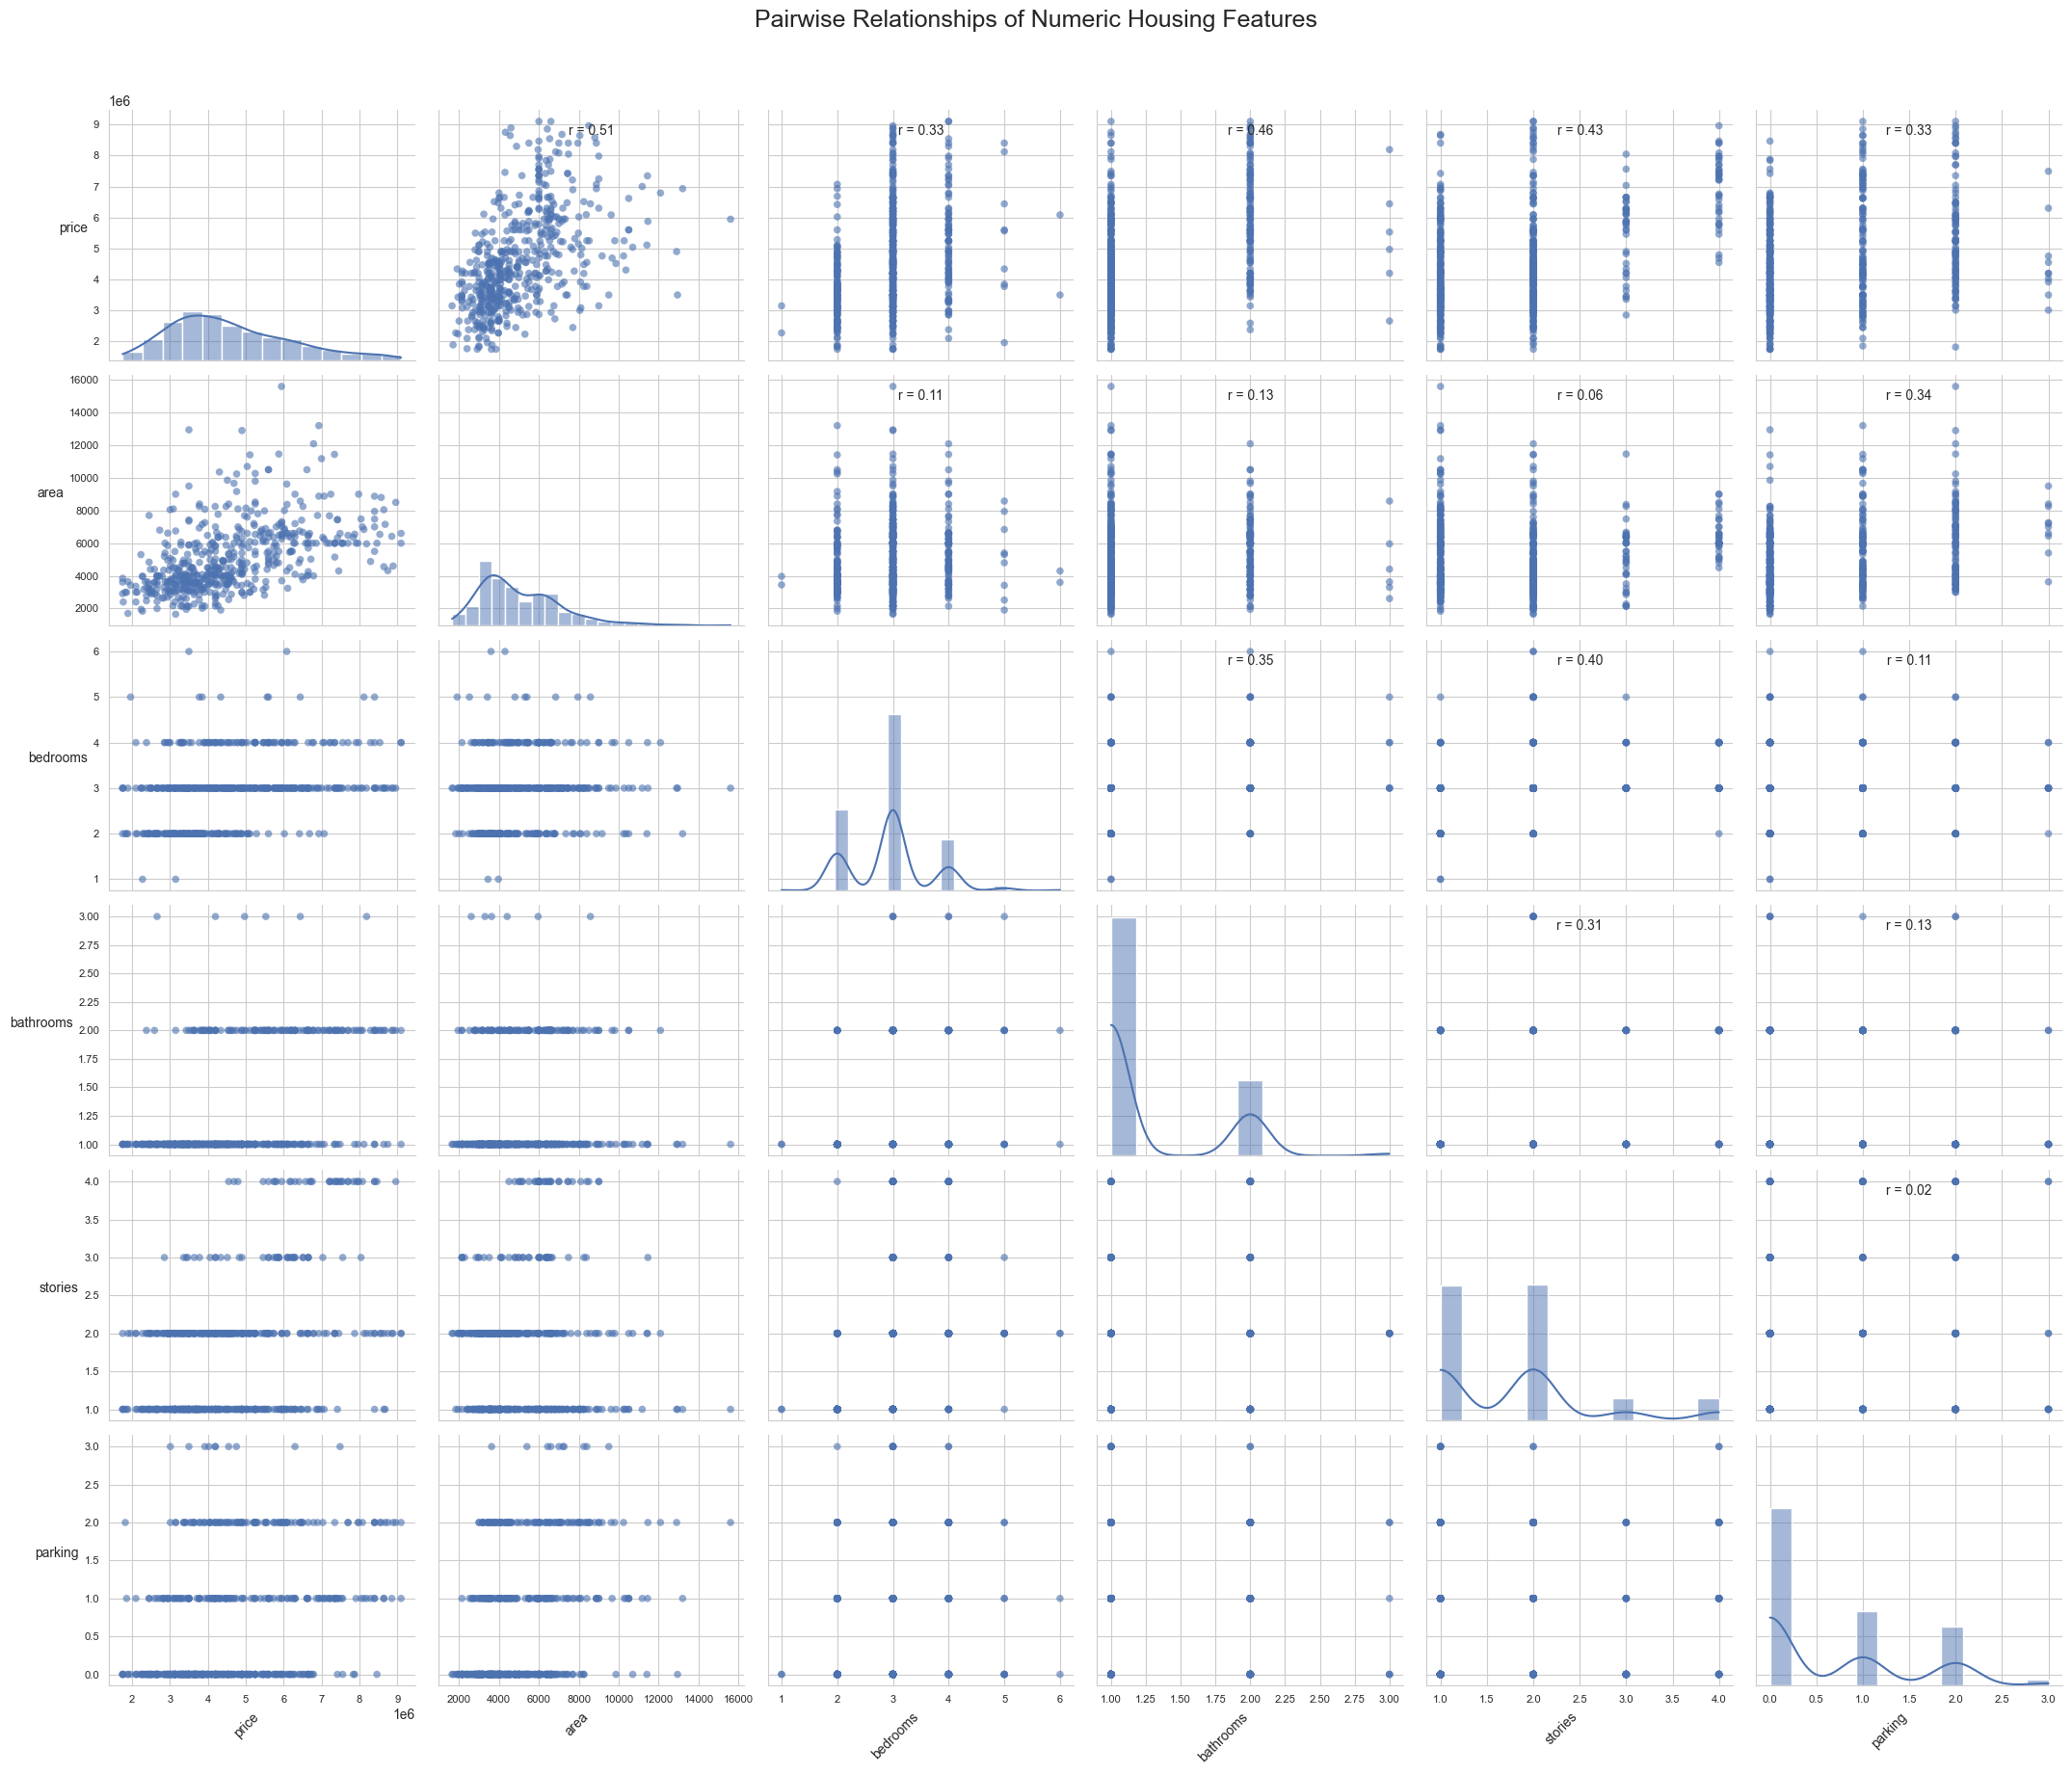

In [15]:
# Create a professional pairplot with enhanced styling
sns.set_style("whitegrid")
sns.set_palette("deep")

# Select only numeric columns for the pairplot
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create the pairplot with customized parameters
g = sns.pairplot(df[numeric_cols], height=3, aspect=1.2,
                 plot_kws=dict(edgecolor="none", alpha=0.6, s=30),
                 diag_kws=dict(fill=True, kde=True))

# Customize the plot appearance
g.fig.suptitle("Pairwise Relationships of Numeric Housing Features", y=1.02, fontsize=18)

# Add correlation coefficients to the upper triangle
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    corr = df[numeric_cols.tolist()[i]].corr(df[numeric_cols.tolist()[j]])
    g.axes[i, j].annotate(f'r = {corr:.2f}', (0.5, 0.9), xycoords='axes fraction', ha='center', fontsize=10)

# Rotate x-axis labels and adjust layout for better readability
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation=45, ha='right', fontsize=10)
    ax.set_ylabel(ax.get_ylabel(), rotation=0, ha='right', fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=8)

plt.tight_layout()
plt.show()

> ***Visualizing Categorical Variables***

*Analyze the relationship between categorical features and house prices using boxplots*

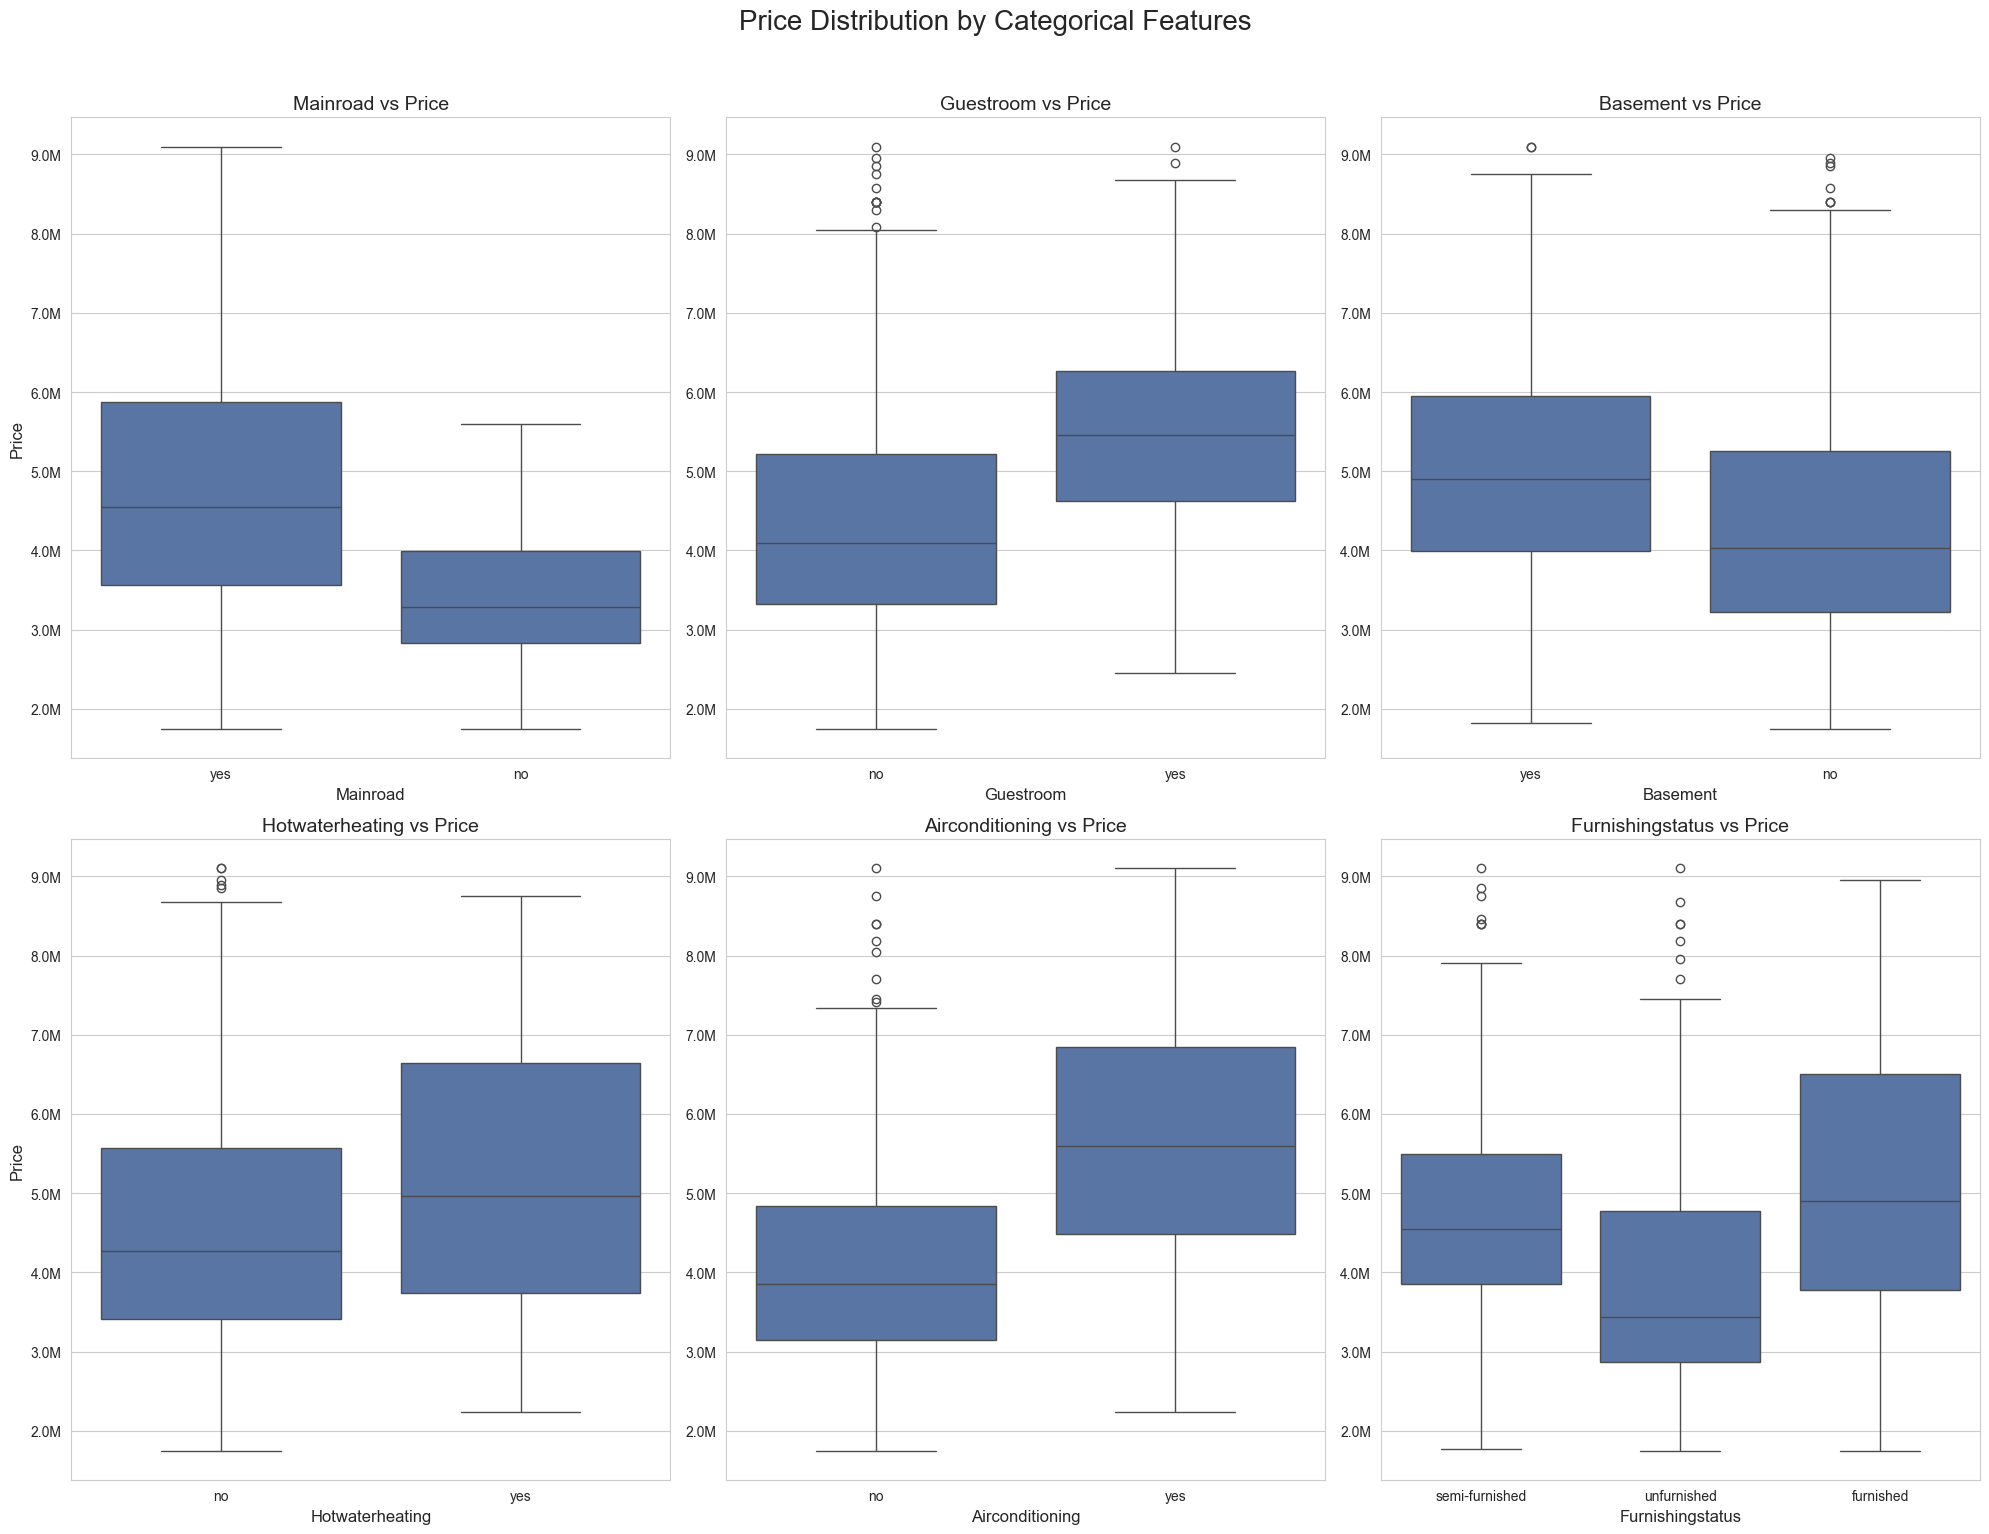

In [16]:
# Set up the plot style
sns.set_palette("deep")

# Create a figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
fig.suptitle('Price Distribution by Categorical Features', fontsize=20, y=1.02)

# List of categorical features
cat_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus']

# Create boxplots
for i, feature in enumerate(cat_features):
    row = i // 3
    col = i % 3
    sns.boxplot(x=feature, y='price', data=df, ax=axes[row, col])
    axes[row, col].set_title(f'{feature.capitalize()} vs Price', fontsize=14)
    axes[row, col].set_xlabel(feature.capitalize(), fontsize=12)
    axes[row, col].set_ylabel('Price' if col == 0 else '', fontsize=12)
    axes[row, col].tick_params(axis='both', which='major', labelsize=10)
    axes[row, col].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))

# Adjust layout and show plot
plt.tight_layout()
plt.show()

## ***3.2 Data Splitting***

*Splitting the Data into Training and Testing Sets*

In [17]:
# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [18]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
48,7455000,4300,3,2,2,yes,no,yes,no,no,1,no,unfurnished
465,3045000,3800,2,1,1,yes,no,no,no,no,0,no,unfurnished
144,5600000,4700,4,1,2,yes,yes,yes,no,yes,1,no,furnished
395,3500000,3600,6,1,2,yes,no,no,no,no,1,no,unfurnished
254,4480000,4510,4,1,2,yes,no,no,no,yes,2,no,semi-furnished


## ***3.3 Data Transformation***

### ***3.3.1 Feature Encoding***

In [19]:
# encode all categorical and object data types columns in train and test dataset
label_encoder_list = []

for col in df_train.columns:
    if df_train[col].dtype == "object" or df_train[col].dtype.name == "category":
        le = LabelEncoder()
        df_train[col] = le.fit_transform(df_train[col])
        df_test[col] = le.transform(df_test[col])
        label_encoder_list.append(le)


In [20]:
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
406,3465000,5320,2,1,1,1,0,0,0,0,1,1,2
489,2835000,3300,3,1,2,0,0,0,0,0,1,0,1
436,3290000,2145,3,1,2,1,0,1,0,0,0,1,0
325,4007500,3460,4,1,2,1,0,0,0,1,0,0,1
317,4060000,4992,3,2,2,1,0,0,0,0,2,0,2


### ***3.3.2 Normality Check***

***Assess data distribution:***

- *If normally distributed: Proceed to data scaling*

- *If not normally distributed: Perform data transformation, then scale*

*Note: Data scaling is optional and depends on model sensitivity to feature scales.*
*Scaling may improve model accuracy for scale-sensitive algorithms.*

In [21]:
# Perform Shapiro-Wilk test for normality on price and area
def check_normality(data, feature_name):
    _, p_value = stats.shapiro(data[feature_name])
    distribution = "normally" if p_value > 0.05 else "not normally"
    print(f"{feature_name.capitalize()} is {distribution} distributed.")

check_normality(df_train, 'price')
check_normality(df_train, 'area')

Price is not normally distributed.
Area is not normally distributed.


### ***3.3.3 Feature Transformation for Normalization***

*We employ Box-Cox transformation to normalize the data.*

 *The optimal transformation method depends on data characteristics and research objectives, and multiple techniques can be applied iteratively to determine the most effective normalization approach.*

In [22]:
# price
df_train['price'], parameters = stats.boxcox(df_train['price'])
stat, p_value = stats.shapiro(df_train['price'])
print(f'Price is normally distributed.') if (p_value > 0.05) else print(f'Price is not normally distributed.')

# area
df_train['area'], parameters = stats.boxcox(df_train['area'])
stat, p_value = stats.shapiro(df_train['area'])
print(f'Area is normally distributed.') if (p_value > 0.05) else print(f'Area is not normally distributed.')

Price is normally distributed.
Area is normally distributed.


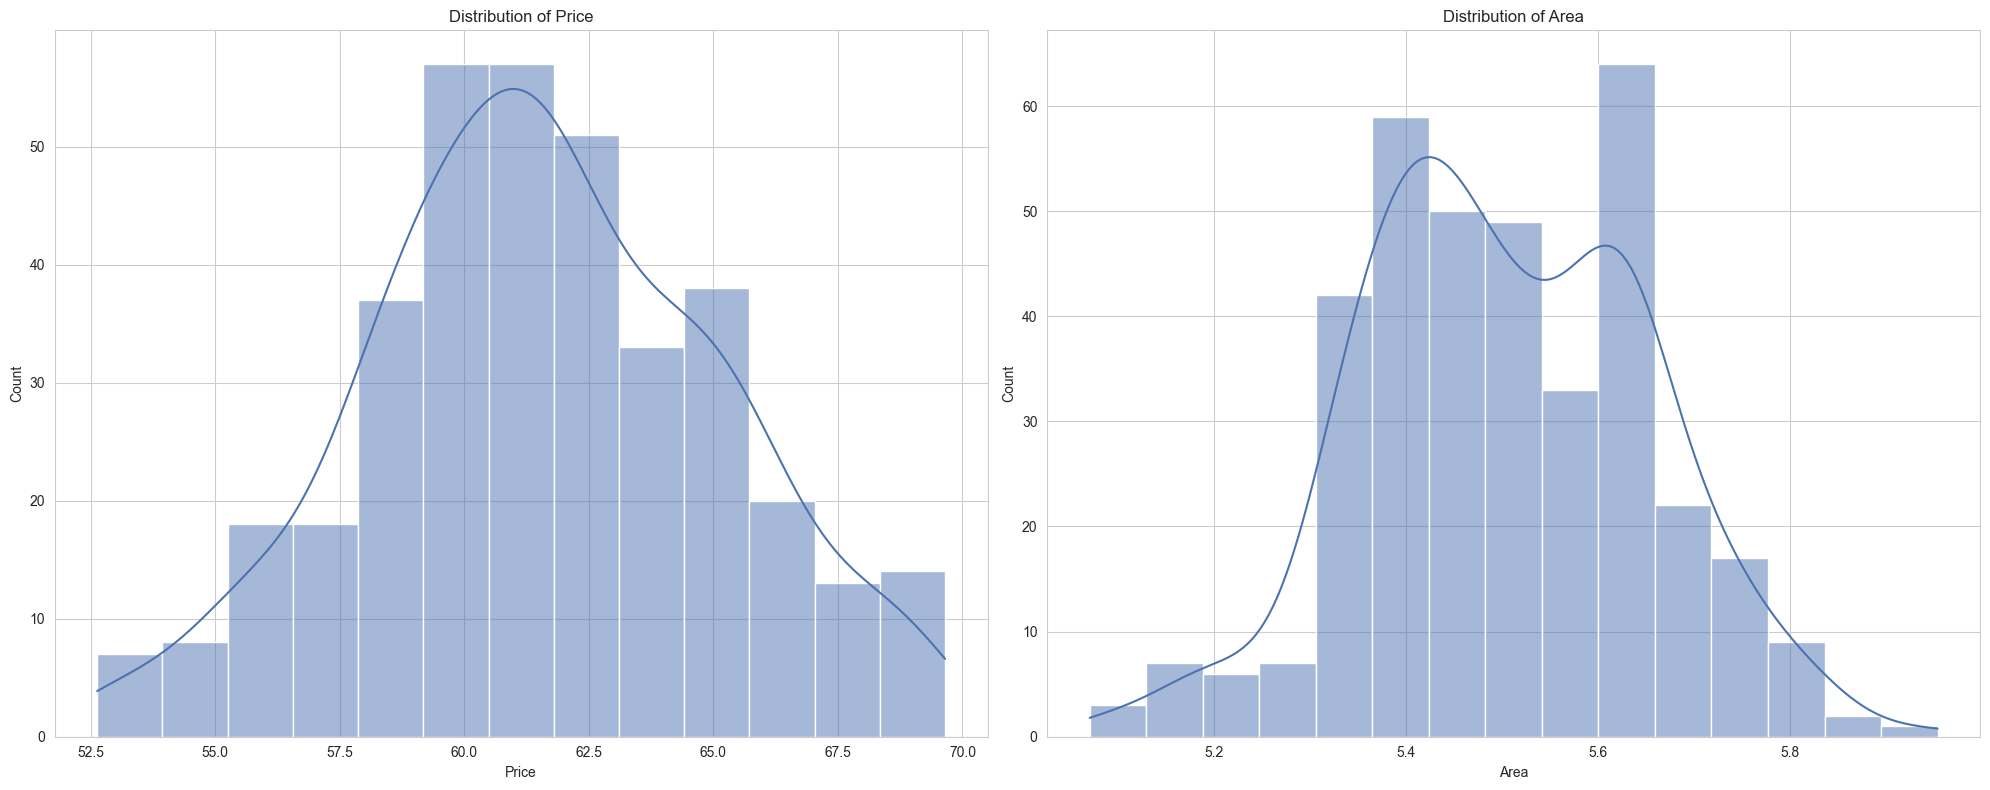

In [23]:
# Visualize the distribution of price and area
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

sns.histplot(df_train['price'], kde=True, ax=ax1)
ax1.set_title('Distribution of Price')
ax1.set_xlabel('Price')

sns.histplot(df_train['area'], kde=True, ax=ax2)
ax2.set_title('Distribution of Area')
ax2.set_xlabel('Area')

plt.tight_layout()
plt.show()

#### ***3.3.4 Feature Scaling***

*Feature scaling is crucial for our model's performance and interpretability. Most features, except 'area' and 'price', have small integer values. Without scaling, the model coefficients for 'area' and 'price' might dominate, leading to difficulties in model evaluation and interpretation.*

*We'll use standardization to rescale our features, which will:*

*Note: While both Min-Max scaling and Standardization (mean=0, std=1) are common scaling methods, we'll use StandardScaler as it's generally preferred for linear regression models.*

In [24]:
# Use StandardScaler for feature scaling
scaler = StandardScaler()

# Define numerical variables to be scaled
numerical_features = ['price', 'area', 'bedrooms', 'bathrooms',  'stories', 'parking', 'furnishingstatus']

# Apply StandardScaler to numerical features in both training and test datasets
df_train[numerical_features] = scaler.fit_transform(df_train[numerical_features])
df_test[numerical_features] = scaler.fit_transform(df_test[numerical_features])

In [25]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
48,1.635414,-0.193167,0.070817,1.658999,0.259208,1,0,1,0,0,0.404635,0,1.285497
465,-1.033786,-0.524605,-1.311972,-0.554989,-0.942869,1,0,0,0,0,-0.777409,0,1.285497
144,0.742296,0.042555,1.453606,-0.554989,0.259208,1,1,1,0,1,0.404635,0,-1.439757
395,-0.642332,-0.670991,4.219184,-0.554989,0.259208,1,0,0,0,0,0.404635,0,1.285497
254,0.072462,-0.066517,1.453606,-0.554989,0.259208,1,0,0,0,1,1.586679,0,-0.077130


### ***3.3.5 Spliting data into X and Y***

*Dividing data into X and Y sets for the model building*

In [26]:
X = df_train.drop('price', axis=1)
y = df_train['price']

In [27]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# ***4. Model Building***

### ***4.1 Linear Regression***

In [28]:
lm = LinearRegression()
lm.fit(X, y)

LinearRegression()

### ***4.2 Ridge Regression***

In [60]:
ridge = Ridge(alpha=12.0)  # You can adjust the alpha value
ridge.fit(X, y)

Ridge(alpha=12.0)

# ***5 Model Evaluation***

*Dividing the test dataset into features X_test and target variable y_test for model evaluation*

In [30]:
X_test = df_test.drop('price', axis=1)
y_test = df_test['price']

In [61]:
# Making predictions
lm_y_pred = lm.predict(X_test)
ridge_y_pred = ridge.predict(X_test)

# evaluate the model
print("Linear Regression")
print("MSE : ", mean_squared_error(y_test, lm_y_pred))
print("r2 : ", r2_score(y_test, lm_y_pred))

print("\nRidge Regression")
print("MSE : ", mean_squared_error(y_test, ridge_y_pred))
print("r2 : ", r2_score(y_test, ridge_y_pred ))

Linear Regression
MSE :  0.3121163082878106
r2 :  0.6878836917121893

Ridge Regression
MSE :  0.3086214553639217
r2 :  0.6913785446360783


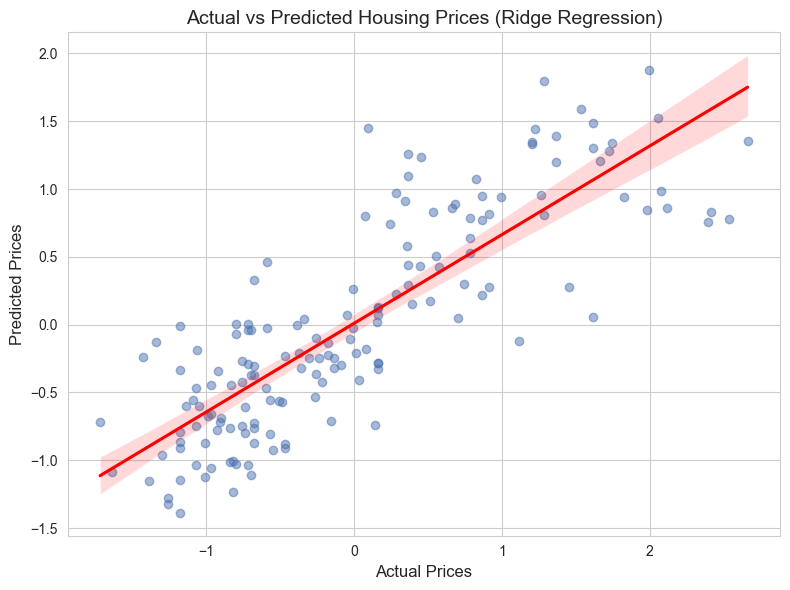

In [72]:
# Visualize Ridge Regression predictions
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=ridge_y_pred, scatter_kws={'alpha':0.5}, line_kws={'color':'r'})
plt.title('Actual vs Predicted Housing Prices (Ridge Regression)', fontsize=14)
plt.xlabel('Actual Prices', fontsize=12)
plt.ylabel('Predicted Prices', fontsize=12)
plt.tight_layout()
plt.show()

# ***6. Conclusion:***

*Our linear regression model has been trained and evaluated. The scatter plot above shows the relationship between actual and predicted housing prices. The model's performance can be assessed using the MSE and R-squared values printed earlier. While not perfect, this model provides a reasonable starting point for predicting housing prices based on the given features.*

*price=0.35×area+0.20×bathrooms+0.19×stories+0.10×airconditioning+0.10×parking+0.11×prefarea*